<div style="background-color:white;" >
<div style="clear: both; display: table;">
  <div style="float: left; width: 14%; padding: 5px; height:auto">
    <img src="img/TUBraunschweig_CO_200vH_300dpi.jpg" alt="TU_Braunschweig" style="width:100%">
  </div>
  <div style="float: left; width: 28%; padding: 5px; height:auto">
    <img src="img/TU_Clausthal_Logo.png" alt="TU_Clausthal" style="width:100%">
  </div>
  <div style="float: left; width: 25%; padding: 5px; height:auto">
    <img src="img/ostfalia.jpg" alt="Ostfalia" style="width:100%">
  </div>
  <div style="float: left; width: 21%; padding: 5px;">
    <img src="img/niedersachsen_rgb_whitebg.png" alt="Niedersachsen" style="width:100%">
  </div>
  <div style="float: left; width: 9%; padding: 5px;">
    <img src="img/internet_BMBF_gefoerdert_2017_en.jpg" alt="bmbf" style="width:100%">
  </div>
</div>
<div style="text-align:center">
<img src="img/ki4all.jpg" alt="KI4ALL-Logo" width="200"/>
</div>
</div>

# Synthetic Biomedical Data – Lesson 2: Data Generation Basics
Part of the *Microcredit Artificial Data Generator* module.

➡️ [Back to Lesson 1: Introduction](01_intro.ipynb)
➡️ [Module README](../README.md)

*Before continuing, please ensure you reviewed the prerequisites and learning goals in Lesson 1.*


### Recap from Lesson 1
- Synthetic biomedical data is artificially generated but mimics statistical properties of real datasets.
- It allows us to know the *ground truth* (feature importance, class distributions).
- Useful for benchmarking, teaching, privacy-preserving research.


## Lesson 2: Data Generation Basics

In this notebook, we will move from theory to practice and learn how to **generate synthetic biomedical datasets** using Python.
You will see how simple tools (e.g., `scikit-learn`) can be used to create datasets that mimic the structure of real biomedical data while allowing full control over:

- **Number of samples** (patients, experiments, or observations)
- **Number of features** (biomarkers or measurements)
- **Number of classes** (e.g., healthy vs. diseased groups)
- **Feature importance** (which features carry useful information)
- **Noise and irrelevant features** (variables that add randomness or distraction)

The goal of this lesson is to give you hands-on experience with creating small, controlled datasets that demonstrate the key concepts of synthetic biomedical data.
Later notebooks will expand this by introducing **pseudo-classes**, **random effects**, and more advanced data structures.

---


### Lesson 2.1 — Generate a simple synthetic dataset

We will create a tiny synthetic dataset that imitates biomedical measurements:
- **Samples** ≈ patients
- **Features** ≈ biomarkers (e.g., gene expression levels)
- **Class** ≈ outcome (e.g., healthy vs. diseased)

This minimal example uses `sklearn.datasets.make_classification`, which lets us control:
- number of samples and features,
- how many features are truly informative,
- the number of classes.

> **Goal:** Get a quick, tangible dataset to explore (as a Pandas DataFrame).


In [1]:
# Lesson 2: First Example – Generate a simple synthetic dataset

from sklearn.datasets import make_classification
import pandas as pd

# Generate a dataset with:
# - 100 samples (rows, like patients)
# - 5 features (columns, like biomarkers)
# - 2 informative features (really matter for classification)
# - 2 classes (e.g., healthy vs diseased)
X, y = make_classification(
    n_samples=30,
    n_features=5,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Put into a DataFrame for easier handling
feature_names = [f"feature_{i+1}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df["class"] = y

# Show first rows
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,class
0,-0.026514,-1.918771,-2.072352,1.097751,-0.074446,1
1,0.328751,0.915402,-1.824213,-2.646789,-0.501757,0
2,0.296120,-1.463515,-0.358545,-0.542258,-0.392108,0
3,-0.192361,2.463242,-1.164086,0.844068,0.060230,1
4,0.097078,0.513267,-1.046329,-0.779901,-0.529760,0


#### Interpretation & Takeaways
- Each **row** is a sample (patient); each **feature_*** column is a biomarker.
- The **class** column is our target (0/1). At this point, the numbers are just synthetic values—what matters is the structure.
- We specified **2 informative features**; the others may behave like noise here.

**Reflection**
- How would changing `n_informative` or `n_features` affect downstream plots and model difficulty?
- What happens if you increase `n_samples` to 1000?


### Lesson 2.2 — Exploring class separability with a scatterplot

Now that we have generated a synthetic dataset, let us check whether the
two classes (*healthy* vs *diseased*) are visually separable using
two of the features. Are the classes visually separable?

Before training any model, we do quick **Exploratory Data Analysis (EDA)**:
1) Check **class balance** (are classes about equally frequent?).
2) Plot a **scatterplot** of two features colored by class.

> **Why this matters:**
> - If the classes overlap strongly, classification will be more difficult.
> - Clear separation suggests simple models might already perform well.

**Tip:** If the plot looks very mixed, try generating the data with a larger `class_sep` (e.g., `class_sep=2.0`) or choose a pair of more **informative** features.

Class distribution:
class
1    15
0    15
Name: count, dtype: int64


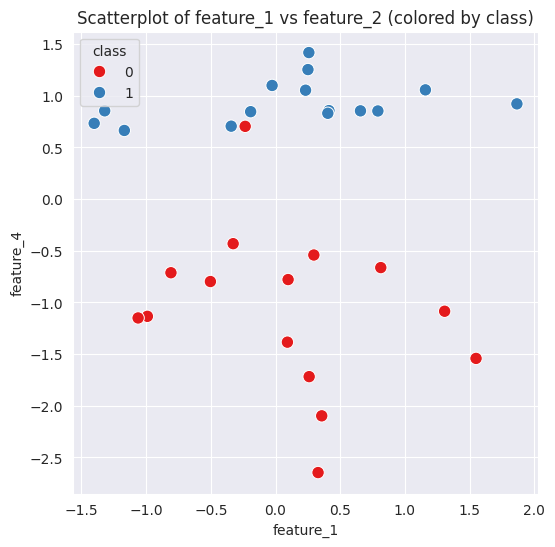

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Show class distribution
print("Class distribution:")
print(df["class"].value_counts())

# 2. Simple scatterplot of two features
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=df,
    x="feature_1",
    y="feature_4",
    hue="class",
    palette="Set1",
    s=80
)
plt.title("Scatterplot of feature_1 vs feature_4 (colored by class)")
plt.show()


#### Interpretation & Takeaways
- In this plot, each point is a sample (like a patient).
- The x- and y-axes show two features (biomarkers).
- Colors indicate the class label (e.g., healthy = red, diseased = blue).
- If clusters are **well separated**, a linear decision boundary may work.
- If points are **intermixed**, more complex models or additional features may be necessary.

In real-world biomedical data, we rarely find features that perfectly
separate classes. Some overlap is normal. This demonstrates why
machine learning models are needed: they can find complex
boundaries even when features alone do not separate cleanly.

**Reflection**
- Try plotting a different pair of features (e.g., `feature_3` vs `feature_4`). Does separability change?
- How might **feature scaling** affect the visual pattern?
- In real biomedical data, why is perfect separation rare?

### Lesson 2.3 — Feature distributions per class

We now examine how each feature is distributed for each class:
- Are the distributions **shifted** (different means)?
- Are they **spread differently** (different variances)?
- Do some features look **uninformative** (almost identical curves)?

> **Why this matters:**
> Visual differences between class-conditional distributions often indicate **predictive signal**.
> If curves overlap almost perfectly, the feature may be **uninformative** for classification.

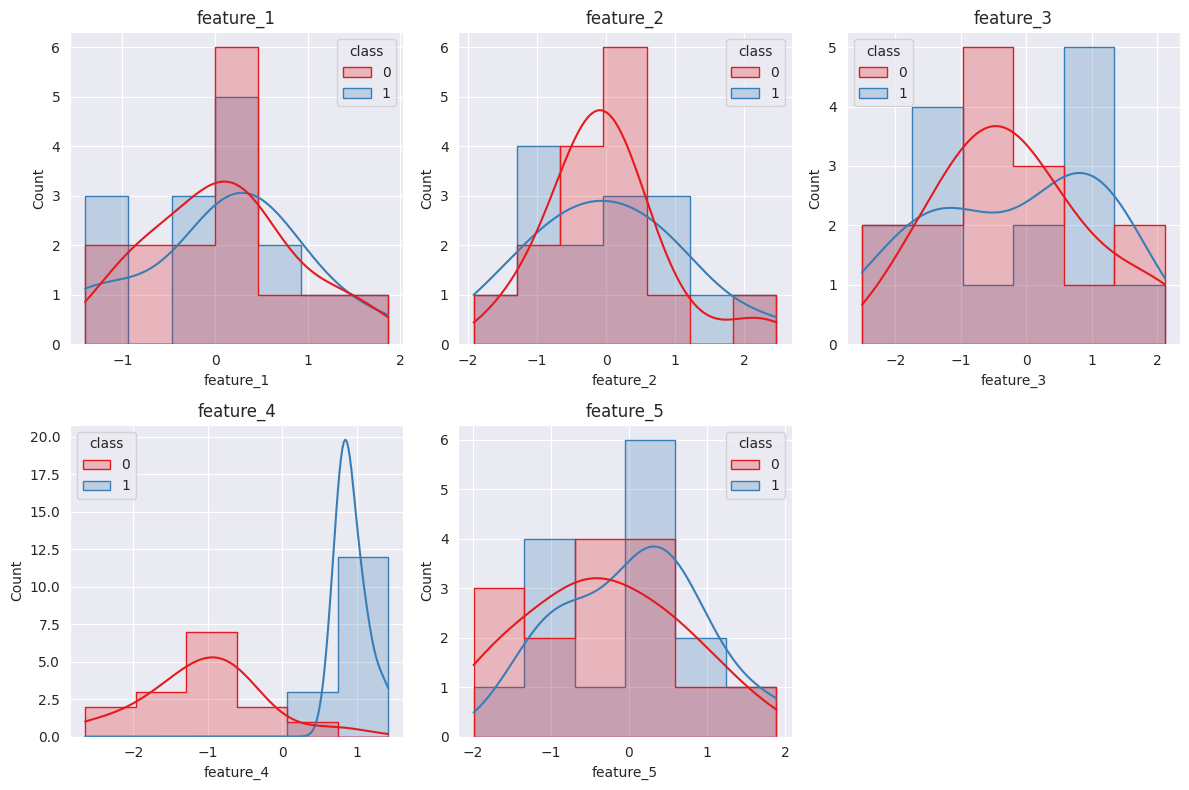

In [3]:
# 3. Visualize feature distributions per class

plt.figure(figsize=(12, 8))

for i, col in enumerate(feature_names, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 columns of plots
    sns.histplot(data=df, x=col, hue="class", kde=True, element="step", palette="Set1")
    plt.title(col)

plt.tight_layout()
plt.show()


#### Interpretation & Takeaways
- Features with **clearly different** class-conditional distributions may be informative.
- Features with **almost identical** distributions across classes are likely **irrelevant** (or need interactions to show signal).
- Synthetic data is great for demonstrating both cases on purpose.

**Reflection**
- Identify 1–2 features that look **most** and **least** informative. How would you justify your choice?
- What happens if you **add noise** during data generation? Do some features lose their apparent signal?
- How would you summarize these plots in a short report for a colleague?


### Mini-Challenge (2–3 minutes)
Regenerate the dataset with:
- `n_informative=3`
- `class_sep=1.5`

Then re-run the scatterplot and histograms.
**Question:** Which features became more/less informative? Why?